In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

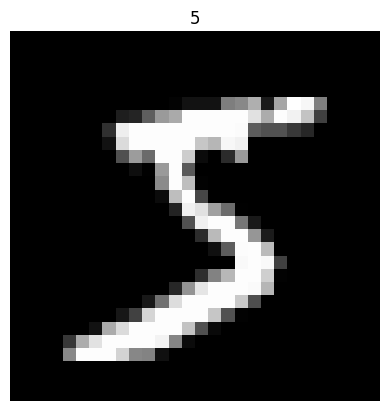

In [6]:
def image_show(image,title):
    plt.imshow(image,cmap = 'grey')
    plt.axis('off')
    plt.title(title)

image_show(X_train[0],y_train[0])

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0

In [13]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

In [14]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history = model.fit(X_train,y_train , epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9796 - loss: 0.0721 - val_accuracy: 0.9895 - val_loss: 0.0361
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9833 - loss: 0.0567 - val_accuracy: 0.9905 - val_loss: 0.0341
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9864 - loss: 0.0422 - val_accuracy: 0.9911 - val_loss: 0.0328
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9882 - loss: 0.0387 - val_accuracy: 0.9910 - val_loss: 0.0348
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9900 - loss: 0.0316 - val_accuracy: 0.9918 - val_loss: 0.0339


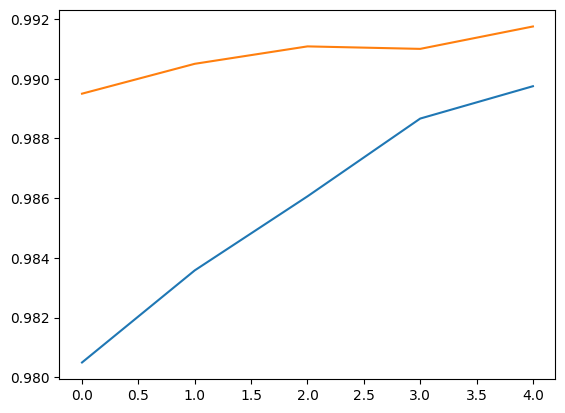

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


<Axes: >

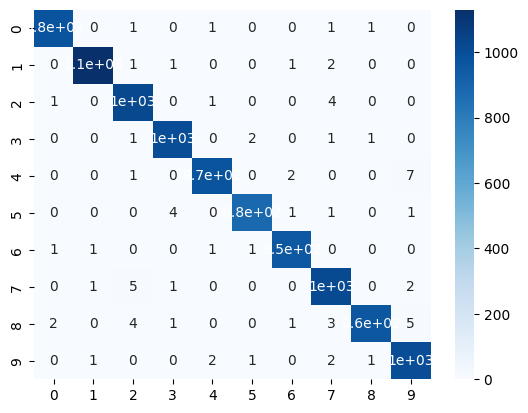

In [22]:
y_preds = np.argmax(model.predict(X_test),axis = 1)
sns.heatmap(confusion_matrix(y_test,y_preds),cmap = 'Blues', annot = True)

In [27]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis = 0)),axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([7])

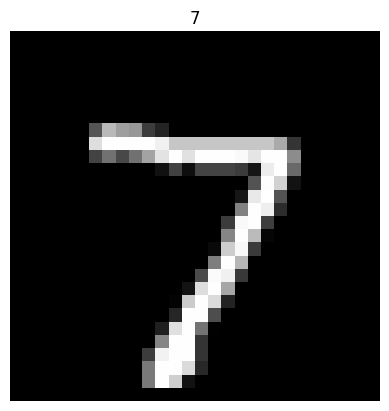

In [28]:
image_show(X_test[0],y_test[0])